In [10]:
from azure.cognitiveservices.language.luis.runtime import LUISRuntimeClient
from msrest.authentication import CognitiveServicesCredentials
import datetime, json, os, time
from python_code import luis
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

In [18]:
luis_app_id ='54718c34-8f7b-436b-a63c-c3058aa847d9'
runtime_key = '6f2572168860492e872e318f68462289'
runtime_endpoint = 'https://luisdemojspm.cognitiveservices.azure.com/'
slot_name = 'staging'

In [19]:
clientRuntime = LUISRuntimeClient(runtime_endpoint, CognitiveServicesCredentials(runtime_key))

Top intent: switch_off
Sentiment: None
Intents: 
	"switch_off"
Entities: light
switch_off_light


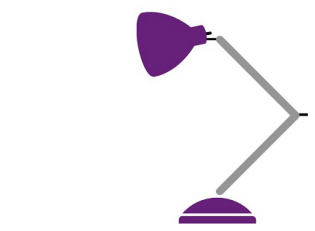

In [29]:
request = { "query" : "turn off light" }
response = clientRuntime.prediction.get_slot_prediction(app_id=luis_app_id, slot_name=slot_name, prediction_request=request)
print("Top intent: {}".format(response.prediction.top_intent))
print("Sentiment: {}".format (response.prediction.sentiment))
print("Intents: ")
intent = format(response.prediction.top_intent)
for intent in response.prediction.intents:    
    print("\t{}".format (json.dumps (intent)))
print("Entities: {}".format (response.prediction.entities['device'][0][0]))
action = intent + '_' + response.prediction.entities['device'][0][0]
print(action)
img_name = action + '.jpg'
img = Image.open(os.path.join("data", "luis" ,img_name))
plt.axis('off')
plt. imshow(img)